### **Load the dataset**

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('sentences.csv')

# Inspect the first few rows
print(data.head())

# Display basic info about the dataset
print(data.info())


                                   darija  \
0    homa mkhbbyin chi haja, ana mti99en!   
1      bayna homa tay7awlo ib9aw mbrrdin.   
2  loTilat mabaynach fihom mori7in bzzaf.   
3      ghaliban ghayjrriw 3lih mn lkhdma!   
4                     Tab3an rah mkta2eb!   

                                                 eng  \
0                They're hiding something, I'm sure!   
1    It's obvious they're trying to keep their cool.   
2            the hotels don't seem very comfortable.   
3  he is probably about to be laid off by head of...   
4                         of course he's depressive!   

                               darija_ar  
0      هوما مخبّيين شي حاجة, أنا متيقّن!  
1     باينا هوما تايحاولو إبقاو مبرّدين.  
2  لوطيلات مابايناش فيهوم موريحين بزّاف.  
3        غاليبان غايجرّيو عليه من لخدما!  
4                     طابعان راه مكتاءب!  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87785 entries, 0 to 87784
Data columns (total 3 columns):
 #   Column     Non-Null C

### **Explore the Dataset**

In [2]:
# Check for missing values
print(data.isnull().sum())

# Display column names
print(data.columns)


darija           0
eng          75042
darija_ar        0
dtype: int64
Index(['darija', 'eng', 'darija_ar'], dtype='object')


            eng_len    darija_len  darija_ar_len
count  87785.000000  87785.000000   87785.000000
mean       1.702683      4.229390       4.229390
std        2.180233      2.040485       2.040485
min        1.000000      1.000000       1.000000
25%        1.000000      3.000000       3.000000
50%        1.000000      4.000000       4.000000
75%        1.000000      5.000000       5.000000
max       38.000000     29.000000      29.000000


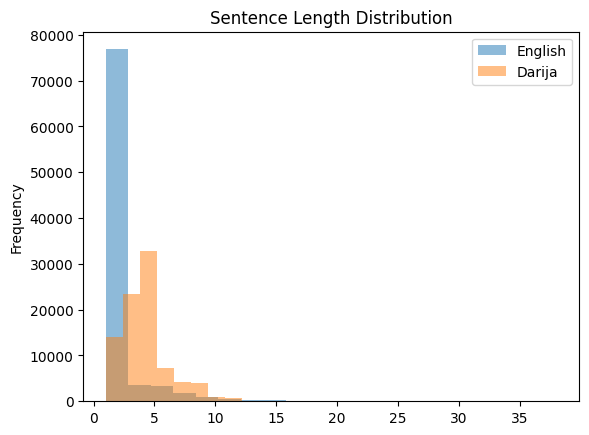

In [3]:
# Add new columns for sentence lengths
data['eng_len'] = data['eng'].apply(lambda x: len(str(x).split()))
data['darija_len'] = data['darija'].apply(lambda x: len(str(x).split()))
data['darija_ar_len'] = data['darija_ar'].apply(lambda x: len(str(x).split()))

# Print basic statistics
print(data[['eng_len', 'darija_len', 'darija_ar_len']].describe())

# Plot distributions of sentence lengths (optional)
import matplotlib.pyplot as plt

data['eng_len'].plot(kind='hist', bins=20, alpha=0.5, label='English')
data['darija_len'].plot(kind='hist', bins=20, alpha=0.5, label='Darija')
plt.legend()
plt.title('Sentence Length Distribution')
plt.show()


### **Clean the Dataset**

In [4]:
# Drop rows with null values
data.dropna(subset=['eng', 'darija', 'darija_ar'], inplace=True)

# Verify no missing values remain
print(data.isnull().sum())


darija           0
eng              0
darija_ar        0
eng_len          0
darija_len       0
darija_ar_len    0
dtype: int64


In [5]:
import re

def clean_text(text):
    # Lowercase, remove special characters, and strip spaces
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.strip()
    return text

# Apply cleaning
data['eng'] = data['eng'].apply(clean_text)
data['darija'] = data['darija'].apply(clean_text)
data['darija_ar'] = data['darija_ar'].apply(clean_text)

# Verify cleaned text
print(data.head())


                                  darija  \
0     homa mkhbbyin chi haja ana mti99en   
1      bayna homa tay7awlo ib9aw mbrrdin   
2  lotilat mabaynach fihom mori7in bzzaf   
3      ghaliban ghayjrriw 3lih mn lkhdma   
4                     tab3an rah mkta2eb   

                                                 eng  \
0                    theyre hiding something im sure   
1       its obvious theyre trying to keep their cool   
2              the hotels dont seem very comfortable   
3  he is probably about to be laid off by head of...   
4                           of course hes depressive   

                             darija_ar  eng_len  darija_len  darija_ar_len  
0        هوما مخبيين شي حاجة أنا متيقن        5           6              6  
1     باينا هوما تايحاولو إبقاو مبردين        8           5              5  
2  لوطيلات مابايناش فيهوم موريحين بزاف        6           5              5  
3        غاليبان غايجريو عليه من لخدما       11           5              5  
4            

### **Split the Dataset**

In [6]:
from sklearn.model_selection import train_test_split

# Split data into train, validation, and test sets
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

# Verify splits
print(f"Training set: {len(train_data)} samples")
print(f"Validation set: {len(val_data)} samples")
print(f"Test set: {len(test_data)} samples")


Training set: 10321 samples
Validation set: 1147 samples
Test set: 1275 samples


### **Data Tokenization**

In [7]:
!pip install transformers
from transformers import AutoTokenizer


In [8]:
# Initialize tokenizers
eng_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
darija_tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [9]:
# Define a function to tokenize a dataset column
def tokenize_data(data, input_col, tokenizer, max_length=50):
    return tokenizer(
        data[input_col].tolist(),  # List of sentences to tokenize
        padding='max_length',     # Pad to max length
        truncation=True,          # Truncate sentences exceeding max_length
        max_length=max_length,    # Maximum token length
        return_tensors="pt"       # Return PyTorch tensors
    )

# Tokenize English and Darija sentences
train_eng_tokens = tokenize_data(train_data, 'eng', eng_tokenizer)
train_darija_tokens = tokenize_data(train_data, 'darija', darija_tokenizer)
val_eng_tokens = tokenize_data(val_data, 'eng', eng_tokenizer)
val_darija_tokens = tokenize_data(val_data, 'darija', darija_tokenizer)
test_eng_tokens = tokenize_data(test_data, 'eng', eng_tokenizer)
test_darija_tokens = tokenize_data(test_data, 'darija', darija_tokenizer)

# Verify tokenized shapes
print(train_eng_tokens['input_ids'].shape)  # Should match training size and max length
print(train_darija_tokens['input_ids'].shape)


torch.Size([10321, 50])
torch.Size([10321, 50])


In [10]:
from torch.utils.data import DataLoader, TensorDataset

# Create TensorDatasets
train_dataset = TensorDataset(train_eng_tokens['input_ids'], train_darija_tokens['input_ids'])
val_dataset = TensorDataset(val_eng_tokens['input_ids'], val_darija_tokens['input_ids'])
test_dataset = TensorDataset(test_eng_tokens['input_ids'], test_darija_tokens['input_ids'])

# Define DataLoaders
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Verify DataLoader
for batch in train_loader:
    print(batch[0].shape, batch[1].shape)  # Input shape: (batch_size, max_length)
    break


torch.Size([32, 50]) torch.Size([32, 50])


### **Define the Baseline Vanilla LSTM Model**

In [34]:
class Seq2SeqLSTM(nn.Module):
    def __init__(self, input_dim, embed_dim, hidden_dim, output_dim, num_layers=1, dropout=0.3):
        super(Seq2SeqLSTM, self).__init__()

        # Embedding layers
        self.encoder_embedding = nn.Embedding(input_dim, embed_dim)
        self.decoder_embedding = nn.Embedding(output_dim, embed_dim)

        # LSTM layers with Dropout
        self.encoder_lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.decoder_lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)

        # Fully connected output layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, src, trg):
        # Encode source sequence
        src_embed = self.encoder_embedding(src)
        _, (hidden, cell) = self.encoder_lstm(src_embed)

        # Decode target sequence
        trg_embed = self.decoder_embedding(trg)
        outputs, _ = self.decoder_lstm(trg_embed, (hidden, cell))

        # Apply linear layer to get predictions
        predictions = self.fc(outputs)
        return predictions


In [35]:
# Define parameters
input_dim = eng_tokenizer.vocab_size
output_dim = darija_tokenizer.vocab_size
embed_dim = 256
hidden_dim = 512
num_layers = 2

# Initialize model
model = Seq2SeqLSTM(input_dim, embed_dim, hidden_dim, output_dim, num_layers)
print(model)


Seq2SeqLSTM(
  (encoder_embedding): Embedding(30522, 256)
  (decoder_embedding): Embedding(30522, 256)
  (encoder_lstm): LSTM(256, 512, num_layers=2, batch_first=True, dropout=0.3)
  (decoder_lstm): LSTM(256, 512, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=512, out_features=30522, bias=True)
)


### **Training the Model**

In [36]:
import torch.optim as optim
from torch.nn import CrossEntropyLoss

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = CrossEntropyLoss(ignore_index=darija_tokenizer.pad_token_id)  # Ignore padding token

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Training function
def train_model(model, data_loader, optimizer, criterion, device):
    model.train()  # Set model to training mode
    total_loss = 0

    for src, trg in data_loader:
        # Move data to device
        src, trg = src.to(device), trg.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(src, trg[:, :-1])  # Input target sequence minus the last token
        outputs = outputs.reshape(-1, outputs.shape[-1])  # Reshape for loss computation
        trg = trg[:, 1:].reshape(-1)  # Shift target by one to match predictions

        # Compute loss
        loss = criterion(outputs, trg)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(data_loader)


In [37]:
def validate_model(model, data_loader, criterion, device):
    model.eval()  # Set model to evaluation mode
    total_loss = 0

    with torch.no_grad():
        for src, trg in data_loader:
            # Move data to device
            src, trg = src.to(device), trg.to(device)

            # Forward pass
            outputs = model(src, trg[:, :-1])
            outputs = outputs.reshape(-1, outputs.shape[-1])
            trg = trg[:, 1:].reshape(-1)

            # Compute loss
            loss = criterion(outputs, trg)
            total_loss += loss.item()

    return total_loss / len(data_loader)


In [32]:
!pip install tqdm


In [38]:
from tqdm import tqdm

# Modified training function with progress bar
def train_model(model, data_loader, optimizer, criterion, device, epoch):
    model.train()  # Set model to training mode
    total_loss = 0

    # Add a progress bar for the batches
    progress_bar = tqdm(enumerate(data_loader), total=len(data_loader), desc=f"Epoch {epoch+1} Training")

    for batch_idx, (src, trg) in progress_bar:
        # Move data to device
        src, trg = src.to(device), trg.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(src, trg[:, :-1])  # Input target sequence minus the last token
        outputs = outputs.reshape(-1, outputs.shape[-1])  # Reshape for loss computation
        trg = trg[:, 1:].reshape(-1)  # Shift target by one to match predictions

        # Compute loss
        loss = criterion(outputs, trg)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Update progress bar with current loss
        progress_bar.set_postfix(loss=loss.item())

    return total_loss / len(data_loader)

# Modified validation function with progress bar
def validate_model(model, data_loader, criterion, device, epoch):
    model.eval()  # Set model to evaluation mode
    total_loss = 0

    # Add a progress bar for the validation process
    progress_bar = tqdm(enumerate(data_loader), total=len(data_loader), desc=f"Epoch {epoch+1} Validation")

    with torch.no_grad():
        for batch_idx, (src, trg) in progress_bar:
            # Move data to device
            src, trg = src.to(device), trg.to(device)

            # Forward pass
            outputs = model(src, trg[:, :-1])
            outputs = outputs.reshape(-1, outputs.shape[-1])
            trg = trg[:, 1:].reshape(-1)

            # Compute loss
            loss = criterion(outputs, trg)
            total_loss += loss.item()

            # Update progress bar with current loss
            progress_bar.set_postfix(loss=loss.item())

    return total_loss / len(data_loader)

# Run training with progress bars
epochs = 7  # Number of training epochs

# Early Stopping Parameters
best_val_loss = float('inf')  # Initialize with a very high value
patience = 3  # Number of epochs to wait for improvement
wait = 0  # Counter to track epochs without improvement

epochs = 20  # Maximum number of epochs

for epoch in range(epochs):
    print(f"Starting Epoch {epoch+1}/{epochs}")

    # Training step
    train_loss = train_model(model, train_loader, optimizer, criterion, device, epoch)

    # Validation step
    val_loss = validate_model(model, val_loader, criterion, device, epoch)

    print(f"Epoch {epoch+1}/{epochs} Completed")
    print(f"Training Loss: {train_loss:.4f} | Validation Loss: {val_loss:.4f}")

    # Check for validation loss improvement
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        wait = 0  # Reset the counter for early stopping
        torch.save(model.state_dict(), "best_model.pt")  # Save the best model
        print("New best model saved!")
    else:
        wait += 1
        print(f"No improvement in validation loss for {wait} epoch(s).")

    # Stop training early if no improvement for 'patience' epochs
    if wait >= patience:
        print("Early stopping triggered!")
        break



Starting Epoch 1/20


Epoch 1 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.25it/s, loss=5.61]


Epoch 1/20 Completed
Training Loss: 5.9546 | Validation Loss: 5.7804
New best model saved!
Starting Epoch 2/20


Epoch 2 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.81it/s, loss=4.74]


Epoch 2/20 Completed
Training Loss: 5.4309 | Validation Loss: 4.9119
New best model saved!
Starting Epoch 3/20


Epoch 3 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.82it/s, loss=4.19]


Epoch 3/20 Completed
Training Loss: 4.5028 | Validation Loss: 4.2707
New best model saved!
Starting Epoch 4/20


Epoch 4 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.27it/s, loss=3.9]


Epoch 4/20 Completed
Training Loss: 4.0184 | Validation Loss: 4.0001
New best model saved!
Starting Epoch 5/20


Epoch 5 Validation: 100%|██████████| 36/36 [00:01<00:00, 33.14it/s, loss=3.78]


Epoch 5/20 Completed
Training Loss: 3.7368 | Validation Loss: 3.8420
New best model saved!
Starting Epoch 6/20


Epoch 6 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.97it/s, loss=3.69]


Epoch 6/20 Completed
Training Loss: 3.5239 | Validation Loss: 3.7387
New best model saved!
Starting Epoch 7/20


Epoch 7 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.55it/s, loss=3.65]


Epoch 7/20 Completed
Training Loss: 3.3469 | Validation Loss: 3.6608
New best model saved!
Starting Epoch 8/20


Epoch 8 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.80it/s, loss=3.5]


Epoch 8/20 Completed
Training Loss: 3.1842 | Validation Loss: 3.5915
New best model saved!
Starting Epoch 9/20


Epoch 9 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.76it/s, loss=3.51]


Epoch 9/20 Completed
Training Loss: 3.0376 | Validation Loss: 3.5521
New best model saved!
Starting Epoch 10/20


Epoch 10 Validation: 100%|██████████| 36/36 [00:01<00:00, 33.22it/s, loss=3.47]


Epoch 10/20 Completed
Training Loss: 2.9072 | Validation Loss: 3.5254
New best model saved!
Starting Epoch 11/20


Epoch 11 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.78it/s, loss=3.52]


Epoch 11/20 Completed
Training Loss: 2.7804 | Validation Loss: 3.5043
New best model saved!
Starting Epoch 12/20


Epoch 12 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.21it/s, loss=3.48]


Epoch 12/20 Completed
Training Loss: 2.6582 | Validation Loss: 3.4921
New best model saved!
Starting Epoch 13/20


Epoch 13 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.79it/s, loss=3.49]


Epoch 13/20 Completed
Training Loss: 2.5412 | Validation Loss: 3.4863
New best model saved!
Starting Epoch 14/20


Epoch 14 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.40it/s, loss=3.41]


Epoch 14/20 Completed
Training Loss: 2.4311 | Validation Loss: 3.5079
No improvement in validation loss for 1 epoch(s).
Starting Epoch 15/20


Epoch 15 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.86it/s, loss=3.48]


Epoch 15/20 Completed
Training Loss: 2.3300 | Validation Loss: 3.5130
No improvement in validation loss for 2 epoch(s).
Starting Epoch 16/20


Epoch 16 Validation: 100%|██████████| 36/36 [00:01<00:00, 32.67it/s, loss=3.44]

Epoch 16/20 Completed
Training Loss: 2.2328 | Validation Loss: 3.5358
No improvement in validation loss for 3 epoch(s).
Early stopping triggered!


### **Evaluate the Model**

In [39]:
from nltk.translate.bleu_score import sentence_bleu

def evaluate_bleu(model, data_loader, tokenizer, device):
    model.eval()
    bleu_scores = []

    with torch.no_grad():
        for src, trg in data_loader:
            # Move data to device
            src, trg = src.to(device), trg.to(device)

            # Generate predictions
            outputs = model(src, trg[:, :-1])
            predicted_ids = torch.argmax(outputs, dim=-1)

            # Convert predictions and targets to text
            for i in range(src.size(0)):
                pred_sentence = tokenizer.decode(predicted_ids[i].tolist(), skip_special_tokens=True)
                target_sentence = tokenizer.decode(trg[i, 1:].tolist(), skip_special_tokens=True)

                # Calculate BLEU score
                bleu_score = sentence_bleu([target_sentence.split()], pred_sentence.split())
                bleu_scores.append(bleu_score)

    return sum(bleu_scores) / len(bleu_scores)


In [40]:
bleu_score = evaluate_bleu(model, test_loader, darija_tokenizer, device)
print(f"BLEU Score: {bleu_score:.4f}")


BLEU Score: 0.0000


In [41]:
from nltk.translate.bleu_score import SmoothingFunction

def evaluate_bleu(model, data_loader, tokenizer, device):
    model.eval()
    bleu_scores = []
    smoother = SmoothingFunction().method1

    with torch.no_grad():
        for src, trg in data_loader:
            src, trg = src.to(device), trg.to(device)
            outputs = model(src, trg[:, :-1])
            predicted_ids = torch.argmax(outputs, dim=-1)

            for i in range(src.size(0)):
                pred_sentence = tokenizer.decode(predicted_ids[i].tolist(), skip_special_tokens=True)
                target_sentence = tokenizer.decode(trg[i, 1:].tolist(), skip_special_tokens=True)

                bleu_score = sentence_bleu([target_sentence.split()], pred_sentence.split(), smoothing_function=smoother)
                bleu_scores.append(bleu_score)

    return sum(bleu_scores) / len(bleu_scores)


In [42]:
def inspect_predictions(model, data_loader, eng_tokenizer, darija_tokenizer, device, num_samples=5):
    model.eval()
    samples = []

    with torch.no_grad():
        for src, trg in data_loader:
            src, trg = src.to(device), trg.to(device)
            outputs = model(src, trg[:, :-1])
            predicted_ids = torch.argmax(outputs, dim=-1)

            for i in range(min(num_samples, src.size(0))):
                eng_sentence = eng_tokenizer.decode(src[i].tolist(), skip_special_tokens=True)
                darija_sentence = darija_tokenizer.decode(trg[i, 1:].tolist(), skip_special_tokens=True)
                pred_sentence = darija_tokenizer.decode(predicted_ids[i].tolist(), skip_special_tokens=True)
                samples.append((eng_sentence, darija_sentence, pred_sentence))

    for eng, darija, pred in samples:
        print(f"English: {eng}")
        print(f"Darija (True): {darija}")
        print(f"Darija (Pred): {pred}")
        print("-" * 30)

# Inspect a few predictions
inspect_predictions(model, test_loader, eng_tokenizer, darija_tokenizer, device)


English: i like a lot of bitter beer
Darija (True): ana kanbghi bzaf t lbirra lmorra
Darija (Pred): 3 kan79 l7f dllasrayouhimt2aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
------------------------------
English: enough
Darija (True): baraka
Darija (Pred): naaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
------------------------------
English: which school did you study at
Darija (True): f ina medrasa 9riti
Darija (Pred): acn lhara kriihaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
------------------------------
English: im a unique child
Darija (True): ana bbou7di
Darija (Pred): ana kana7tokchaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
------------------------------
English: id like to go with you but not today
Darija (True): bghit nmchi m3ak walakin machi lyom
Darija (Pred): bghit nchi ltte chiakin 7i mo9m2aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa
------------------------------
English: he must have been near his friends house
Darija (True): ghadi ykon 9rib mn dar sa7bo
Darija (Pred): kayhadi ykon hadbalb f l l7biaaaa